In [1]:
import numpy as np
import os
import pandas as pd
from PIL import Image
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, Callback
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
class TimingCallback(Callback):
    def on_train_begin(self, logs=None):
        self.train_start = time.time()
        self.epoch_times = []

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start = time.time()

    def on_epoch_end(self, epoch, logs=None):
        elapsed = time.time() - self.epoch_start
        self.epoch_times.append(elapsed)
        print(f" Epoch {epoch+1} : {elapsed:.2f} seconds")

    def on_train_end(self, logs=None):
        total_time = time.time() - self.train_start
        print(f" Total time: {total_time:.2f} seconds")

In [4]:
# load training data
# X_train = np.load('./train_test/X_features.npy')
# y_train = np.load('./train_test/y_labels.npy')

train_folder = './train_dataset'
image_names = []
X_train = []
y_train = []

for filename in os.listdir(train_folder):
    if filename.endswith('.png'):
        path = os.path.join(train_folder, filename)

        # read images
        img = Image.open(path).convert('L')
        img_array = np.array(img).flatten()
        X_train.append(img_array)

        # extract the real y label
        image_names.append(filename[:-4])
        label = filename.split('-')[-2]    # y label
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = X_train.reshape(-1, 32, 32, 1).astype('float32') / 255.0
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [4]:
# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(y_train_encoded)), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\q Q h\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,500 (1.21 MB)

 Trainable params: 318,500 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# CNN model 2
datagen = ImageDataGenerator(
    rotation_range=10,           # random rotate degree
    width_shift_range=0.1,       
    height_shift_range=0.1,
    zoom_range=0.1,              # random zoom range
    horizontal_flip=False,      # not using horizontal_flip in char 
    featurewise_center=True,
    featurewise_std_normalization=True
)

# datagen.fit(X_train)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(np.unique(y_train_encoded)), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\q Q h\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,148 (914.64 KB)

 Trainable params: 233,700 (912.89 KB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
# Train the model
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

timing = TimingCallback()

history = model.fit(
    X_train,
    y_train_encoded,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping, timing]
)

Epoch 1/50
635/636 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7994 - loss: 0.6731 Epoch 1 : 24.26 seconds
636/636 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.7994 - loss: 0.6731 - val_accuracy: 0.8019 - val_loss: 0.7403
Epoch 2/50
634/636 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8195 - loss: 0.5936 Epoch 2 : 23.50 seconds
636/636 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.8195 - loss: 0.5937 - val_accuracy: 0.8081 - val_loss: 0.7155
Epoch 3/50
634/636 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8293 - loss: 0.5700 Epoch 3 : 23.42 seconds
636/636 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.8293 - loss: 0.5700 - val_accuracy: 0.8047 - val_loss: 0.7513
Epoch 4/50
634/636 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8332 - loss: 0.5496 Epoch 4 : 23.48 seconds
636/636 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.8332 - loss: 0.5497 - val_accuracy: 0.8087 - val_loss: 0.7304
Epoch 5/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8409 - loss: 

In [16]:
# load test dataset
test_folder = './test_dataset'
X_test = []
y_test = []
image_names = []

for filename in os.listdir(test_folder):
    if filename.endswith('.png'):
        path = os.path.join(test_folder, filename)
        img = Image.open(path).convert('L')
        img_array = np.array(img).astype('float32') / 255.0
        X_test.append(img_array.reshape(32, 32, 1))
        image_names.append(filename[:-4])
        label = filename.split('-')[-2]
        y_test.append(label)

X_test = np.array(X_test)
y_test_encoded = le.transform(y_test)

In [23]:
# Evaluation
y_pred_probs = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_probs, axis=1)
y_pred = le.inverse_transform(y_pred_encoded)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       335
           1       0.53      0.60      0.56       308
           2       0.81      0.85      0.83       314
           3       0.88      0.87      0.88       334
           4       0.87      0.80      0.84       313
           5       0.87      0.71      0.78       315
           6       0.88      0.87      0.87       297
           7       0.81      0.84      0.83       304
           8       0.84      0.83      0.84       329
           9       0.88      0.80      0.83       327
           a       0.83      0.76      0.80       350
           b       0.84      0.78      0.81       312
           c       0.84      0.86      0.85       327
           d       0.84      0.84      0.84       336
           e       0.78      0.88      0.83       308
           f       0.81      0.83      0.82       315
           g     

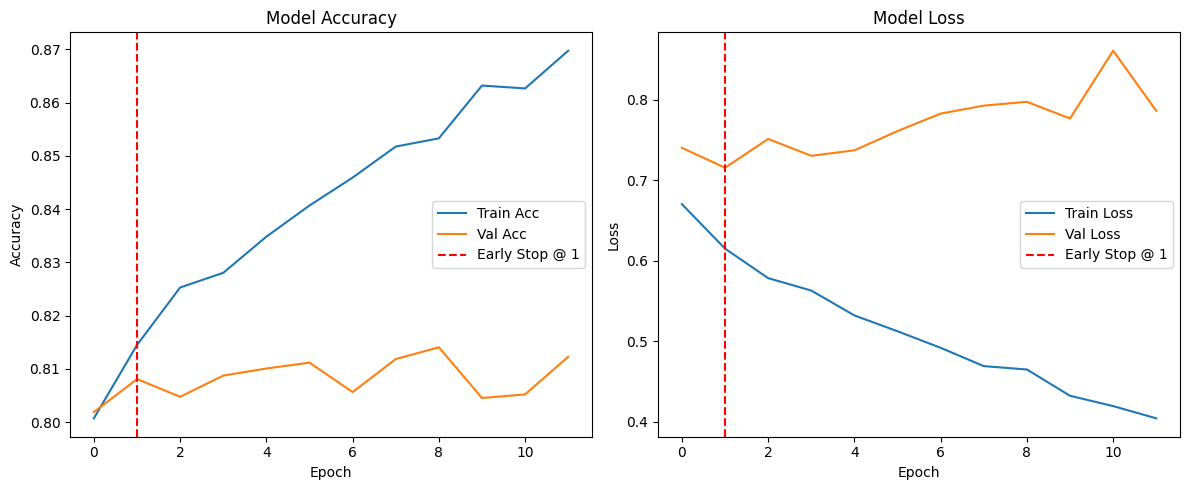

In [24]:
# Draw accuracy / loss plot
best_epoch = len(history.history['loss']) - early_stopping.patience - 1

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.axvline(best_epoch, color='red', linestyle='--', label=f'Early Stop @ {best_epoch}')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.axvline(best_epoch, color='red', linestyle='--', label=f'Early Stop @ {best_epoch}')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('cnn_training_curves.png')
plt.show()

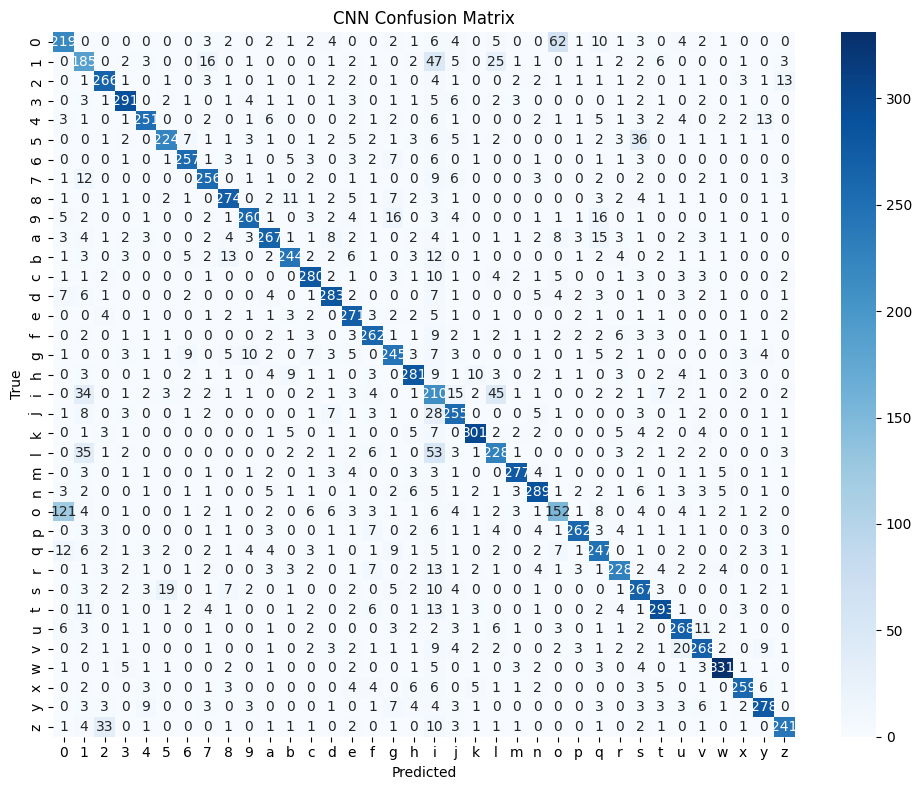

In [25]:
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix_cnn.png')
plt.show()

In [26]:
# Save results

df = pd.DataFrame({
    'Image_Name': image_names,
    'True_Label': y_test,
    'Predicted_Label': y_pred
})
df.to_csv('cnn_predictions.csv', index=False)
print("Results save in cnn_predictions.csv")

# Group by 'Image_Name', check the Catpcha
grouped = df.groupby('Image_Name').apply(
    lambda x: (x['True_Label'] == x['Predicted_Label']).all()
)

# calculate the accuracy
probability = grouped.mean()
print(f"Probability that all True_Label == Predicted_Label for the same Image_Name: {probability:.4f}")

Results save in cnn_predictions.csv
Probability that all True_Label == Predicted_Label for the same Image_Name: 0.7851


C:\Users\q Q h\AppData\Local\Temp\ipykernel_7032\2285502644.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('Image_Name').apply(


In [11]:
# Save model
model.save('cnn_model.h5')
print("model stores in cnn_model.h5")

model stores in cnn_model.h5
